In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np                     
import matplotlib.pyplot as plt
import os



In [2]:
import time 
import pickle
import pandas as pd
from pathlib import Path
from PIL import Image
import h5py
from pathlib import Path
import json
from os import listdir
import itertools

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [4]:
import cv2 as cv
import random
import torchvision
import glob

In [5]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

print('done loading')

done loading


In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D,Dropout,Activation,LeakyReLU
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator 
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
print('done loading')

done loading


In [7]:
def folders_in_path(path): #takes path as input
    if not Path.is_dir(path): #checks if path exsist
        raise ValueError("argument is not directory") #produses error
        #if not in directory
    yield from filter(Path.is_dir,path.iterdir())
def folders_in_depth(path,depth):
    if 0>depth:
        raise ValueError("depth smaller 0")
    if 0==depth:
        yield from folders_in_path(path)
    else:
        for folder in folders_in_path(path):
            yield from folders_in_depth(folder,depth-1)
def files_in_path(path):
    if not Path.is_dir(path):
        raise ValueError("argument is not a directory")
    yield from filter(Path.is_file,path.iterdir())
def sum_file_size(filepaths):
    return sum([filep.stat().st_size for filep in filepaths])
def convert_image_to_array(image_dir):
    try:
        image = cv.imread(image_dir)
        if image is not None :
            image = cv.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None 
  

In [8]:
def load_train(path):
    images = []
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)
 

In [9]:
path = 'F:\\Code_complete\\train\\'
type_data='malignant\\'  
subject=type_data+'ISIC_0000002.jpg' #____________ CHECK IF FILE IS THERE ____________
print(subject) 

malignant\ISIC_0000002.jpg


F:\Code_complete\train\malignant\ISIC_0000002.jpg


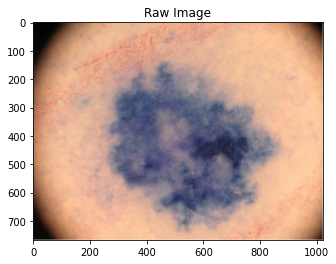

In [10]:
full_data=os.path.join(path,subject)
print(full_data)
image = cv.imread(full_data)
plt.imshow(image,cmap="gray")
plt.title('Raw Image')
plt.show()
  

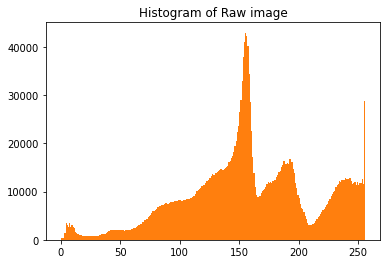

done


In [11]:
# Extract histogram of image 
plt.hist(image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.title('Histogram of Raw image')
plt.show()
print('done')   

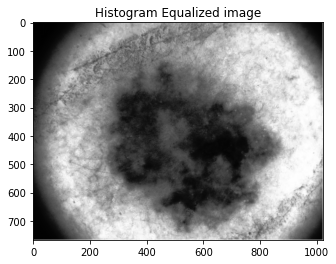

In [12]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
histogram_equalized = cv.equalizeHist(gray_image) 
plt.imshow(histogram_equalized,cmap="gray")
plt.title('Histogram Equalized image')
plt.show()
   

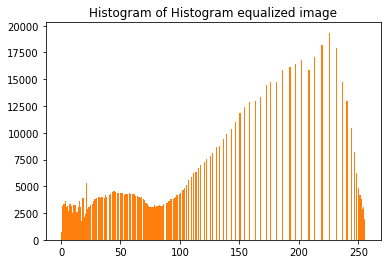

In [13]:
# Extract histogram of image 
plt.hist(histogram_equalized.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram
plt.hist(histogram_equalized.ravel(),256,[0,256]) 
plt.title('Histogram of Histogram equalized image')
plt.show()
 

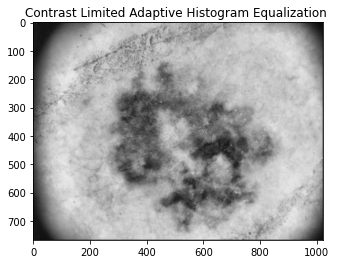

In [14]:
clahe = cv.createCLAHE(clipLimit =2) 
final_img = clahe.apply(gray_image ) + 10
plt.imshow(final_img,cmap="gray")
plt.title('Contrast Limited Adaptive Histogram Equalization ')
plt.show()

In [17]:
# looking into complete folder to understand number of images 
path = 'F:\\Code_complete\\train\\'
train = os.listdir(path)
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)
labels = folders
print (f'The labels are {labels}')
image_size = 256
train_images = load_train(path)
X = []
y = []
for feature, label in train_images:
    X.append(feature)
    y.append(label)
print('Done loading all images')    
print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')
## checking the number of images of each class
a = 0
b = 0
c = 0
d = 0
e = 0
for label in y:
   if label == 0:
        a += 1
   if label == 1:
       b += 1
   if label == 2:
       c += 1
   if label == 3:
       d += 1
   if label == 4:
       e += 1
#        
print (f'Number of class 1 images = {a}')
print (f'Number of class 2 images = {b}')

 


['Benign', 'Malignant']
The labels are ['Benign', 'Malignant']
Done loading all images
Length of X = 167
Length of y = 167
Number of class 1 images = 81
Number of class 2 images = 86


In [18]:
train_path='train'
EPOCHS = 10 #50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [19]:
image_list, label_list = [], []
train_labels=os.listdir(train_path) #take training path labels
train_labels.sort() #sort the labels
print(train_labels) #primt the lables
global_features=[] #initialize variable to combine all features
labels=[] #create label variables so as to decode text to number
total=0 #initialize
tot_file=[] #initialize
count=1 #start count to check number of images
i=0
j=0
k=0
print(Path.cwd()) #gives the current path

['Benign', 'Malignant']
F:\Code_complete


In [20]:
for folder in folders_in_depth(Path.cwd(),1):
        #first loop will pick the first foldend then next folder
        files=list(files_in_path(folder)) #list all files in folder
        file=len(files) #length of files
        tot_file.append(file) #because we are running for all folder
        # we are appending all files in tot_file at the end we
        #shall get the list of number of files in the folder
        #we are doing this because every folder has different number of files
        #at the end when we are trainig all class of disease have to be
        #trained equally, hence find the least number of images in the folder
        #and then train accordingly
        total_size=sum_file_size(files)
        #total size of files
        count=count+1 #check total number of files executed
        print(f'{folder}:filecount:{len(files)},total size:{total_size}')

F:\Code_complete\train\Benign:filecount:81,total size:99472549
F:\Code_complete\train\Malignant:filecount:86,total size:330264451


In [63]:
tot_file.sort() #sort files based on ascending order
num=120#tot_file[2] #Index 0 is junkhence extract index 1
print('tOTAL FILE:',tot_file)
print(num) 

tOTAL FILE: [81, 86]
120


In [64]:
images_per_class=num #consider number of images per class
#%%START WITH TRAINING
#for tr_name in range(0,2):
count=0   

In [65]:
path1='F:\\Code_complete\\train\\'
 
print(images_per_class)

120


In [66]:
for count in range(0,len(train_labels)):
   
    tr_name=count
    
    dir=path1+'/'+train_labels[tr_name]
    print(dir)
    current_label=train_labels[tr_name]
    print("[STATUS] processed folder: {}".format(current_label))
    k=1
    file_sub_folder=os.listdir(dir) 
    for x in range(0,images_per_class):
        file=dir +'/'+ file_sub_folder[x]
#         print(file)    
        image_list.append(convert_image_to_array(file ))
        label_list.append(current_label) 
        i+=1
        k+=1    
        count=count+1
print("[STATUS] training labels{}".format(np.array(label_list).shape))

F:\Code_complete\train\/Benign
[STATUS] processed folder: Benign
F:\Code_complete\train\/Malignant
[STATUS] processed folder: Malignant
[STATUS] training labels(460,)


In [68]:
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
label = np.hstack((image_labels, 1 - image_labels))
print(label)

460
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [

pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)
print(n_classes)

In [69]:
print(len(image_list))



460


In [70]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, label, test_size=0.2, random_state = 42) 


[INFO] Spliting data to train, test


In [71]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt ='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [72]:
# Create the model
input_shape=x_test[0].shape
model = Sequential()
model.add(Conv2D(4, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Conv2D(8, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(6, 6), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(6, 6), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation("softmax"))
# Compile the model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 255, 255, 4)       52        
_________________________________________________________________
batch_normalization_8 (Batch (None, 255, 255, 4)       16        
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 255, 255, 4)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 8)         520       
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 8)         32        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 60, 60, 8)        

In [73]:
y_test

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1,

In [81]:
 model.fit(x_train, y_train, epochs=20, batch_size=20, verbose=1)
    ## PLEASE CHNAGE EPOCH TO 100  AND BATCH SIZE will BE 30 if t0tal dataset is 300 or 20 if dataset is less than 

Epoch 1/20
19/19 [==============================] - 23s 565ms/step - loss: 0.2515 - accuracy: 0.9293
Epoch 2/20
19/19 [==============================] - 8s 435ms/step - loss: 0.2009 - accuracy: 0.9484
Epoch 3/20
19/19 [==============================] - 9s 453ms/step - loss: 0.1685 - accuracy: 0.9620
Epoch 4/20
19/19 [==============================] - 9s 448ms/step - loss: 0.1313 - accuracy: 0.9647
Epoch 5/20
19/19 [==============================] - 8s 440ms/step - loss: 0.1105 - accuracy: 0.9755
Epoch 6/20
19/19 [==============================] - 8s 439ms/step - loss: 0.0900 - accuracy: 0.9810
Epoch 7/20
19/19 [==============================] - 8s 440ms/step - loss: 0.0715 - accuracy: 0.9891
Epoch 8/20
19/19 [==============================] - 8s 438ms/step - loss: 0.0621 - accuracy: 0.9946
Epoch 9/20
19/19 [==============================] - 8s 442ms/step - loss: 0.0568 - accuracy: 0.9973
Epoch 10/20
19/19 [==============================] - 8s 435ms/step - loss: 0.0452 - accuracy: 0.997

In [82]:
from sklearn import metrics
pred=np.round(model.predict(x_test))
skin_data=['BENIGN','MALIGNANT']
metrics=metrics.classification_report(y_test,pred,target_names=chest_xray)
print(metrics)

              precision    recall  f1-score   support

      BENIGN       0.96      0.90      0.92        48
   MALIGNANT       0.89      0.95      0.92        44

   micro avg       0.92      0.92      0.92        92
   macro avg       0.92      0.93      0.92        92
weighted avg       0.93      0.92      0.92        92
 samples avg       0.92      0.92      0.92        92



In [83]:
from sklearn.metrics import confusion_matrix
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
predictions



0     1
1     0
2     0
3     0
4     0
     ..
87    1
88    0
89    1
90    0
91    0
Length: 92, dtype: int64

In [84]:
confusion_matrix= confusion_matrix(test_labels, predictions)

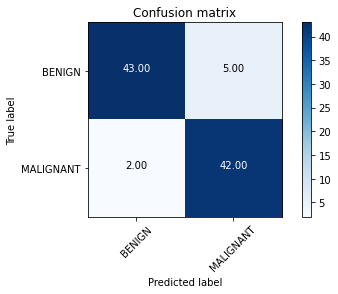

In [85]:
plot_confusion_matrix(confusion_matrix,['BENIGN','MALIGNANT'],normalize=True)

In [86]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_labels, predictions)
print('Accuracy:',accuracy*100)

Accuracy: 92.3913043478261


In [87]:
test_image = cv.resize(cv.imread(full_data),  (256,256))
test_image = np.array(test_image).reshape( 1,256, 256, -1)
pred=model.predict(test_image)
pos,val=np.where(pred==1)
print(pred)
skin_data[int(val)]  

[[1. 0.]]


'BENIGN'